**Question 1 [ 40 Points ] - Support Vector Machines (SVMs)** 

[25 points ] Download this dataset, split it as a 80% training and 20% test set. and implement the support vector algorithm from scratch using Numpy and Pandas.

[10 points ] Report the accuracies for the train and test sets. Comment on whether your model has overfit.

[5 points] Test your model performance with the scikit-learn model. Comment on the difference in accuracy. 


### Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv("iris.data", header=None, sep=',', names = names)

In [3]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['target'] = enc.fit_transform(df['class'])
df = df.drop('class', axis=1)

In [5]:
# Train test split
from sklearn.model_selection import train_test_split

#X = df.drop('target', axis=1)
#X = np.array(df[['petal-length', 'petal-width']])
X = df.drop(df[df.target == 2].index)
X = np.array(X[['petal-length', 'petal-width']])

#y = np.array(df['target'])
y = df.drop(df[df.target == 2].index)
y = y['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [6]:
# reference
# https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/blob/main/09%20SVM/svm.py
class SVM:

    def __init__(self, lr=0.001, lambda_value=0.01, num_iterations=1000):
        self.lr = lr
        self.lambda_value = lambda_value
        self.num_iterations = num_iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_value * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_value * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

### Part 2

In [7]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [8]:
clf = SVM()

In [9]:
clf.fit(X_train, y_train)

In [10]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [11]:
print(f"Train accuracy on SVM scratch: {accuracy(y_train, train_pred) * 100}%")
print(f"Test accuracy on SVM scratch: {accuracy(y_test, test_pred) * 100}%")

Train accuracy on SVM scratch: 46.25%
Test accuracy on SVM scratch: 65.0%


### Part 3

In [12]:
from sklearn.svm import SVC

In [13]:
svc = SVC(kernel='linear')

In [14]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
svc.predict(X_test)

print(f"Train accuracy on sklearn SVM: {svc.score(X_train, y_train) * 100}%")
print(f"Test accuracy on sklearn SVM: {svc.score(X_test, y_test) * 100}%")

Train accuracy on sklearn SVM: 100.0%
Test accuracy on sklearn SVM: 100.0%


We are using 2 features on the SVM from scratch - petal length and petal width. To maintain similarity, the sklearn version of SVM also used those 2 features. However, the sklearn version of SVM correctly classified all the points. This might point out to overfitting but it should also be noted that sklearn uses RBF as the kernel function and optimizes it using its default parameters. Also because of the 2 features, the size reduced from 150 to 100 which could also pose the fact that the data got reduced which means that the model will correctly classify the points.

For the SVM using numpy as pandas, the model is not optimized which leads to poor accuracy. Below is the plot for the numpy version of SVM.

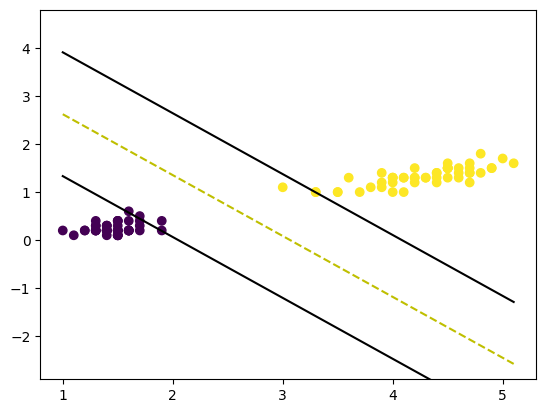

In [16]:
# reference
# https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/blob/main/09%20SVM/svm.py

def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()

As evident from the figure, we can see that the support vectors are not correct. There are some points that fall inside the support vector, reducing the accuracy.

**Question 2 [ 40 Points ] - Decision Trees** 

a. [5 points] Complete the test_split function.

b. [5 points] Complete the gini_index function.

c. [5 points] Complete the get_split function.

d. [15 points] Complete the split function.

e. [10 points] Print the tree. 

In [17]:
from sklearn.datasets import load_iris
import numpy as np

In [18]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
            
	return left, right

In [19]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
    
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# zero division check
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
        
	return gini

In [20]:
# Select the best split point for a dataset
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
    
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
                
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [21]:
# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

In [22]:
# Create child splits for a node or make terminal
#Hint : Just call the to_terminal and get_split functions defined above. 
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
    
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
    
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
        
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)

In [23]:
# Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root

In [24]:
# Print a decision tree
def print_tree(node, depth=0):
	if isinstance(node, dict):
		print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
		print_tree(node['left'], depth+1)
		print_tree(node['right'], depth+1)
	else:
		print('%s[%s]' % ((depth*' ', node)))

In [25]:
iris= load_iris()

X= np.array(iris.data)
y= np.array(iris.target).reshape(-1,1)

data = np.append(X,y,axis=1)

In [26]:
tree = build_tree(data, 1, 1)
print_tree(tree)

X1 < 5.100 Gini=0.547
X1 < 4.900 Gini=0.587
X1 < 4.700 Gini=0.624
X1 < 4.600 Gini=0.644
X1 < 5.000 Gini=0.581
X1 < 5.400 Gini=0.474
X1 < 4.600 Gini=0.644
X1 < 5.000 Gini=0.581
X1 < 4.400 Gini=0.662
X1 < 4.900 Gini=0.587
X1 < 5.400 Gini=0.474
X1 < 4.800 Gini=0.614
X1 < 4.800 Gini=0.614
X1 < 4.300 Gini=0.667
X1 < 5.800 Gini=0.475
X1 < 5.700 Gini=0.475
X1 < 5.400 Gini=0.474
X1 < 5.100 Gini=0.547
X1 < 5.700 Gini=0.475
X1 < 5.100 Gini=0.547
X1 < 5.400 Gini=0.474
X1 < 5.100 Gini=0.547
X1 < 4.600 Gini=0.644
X1 < 5.100 Gini=0.547
X1 < 4.800 Gini=0.614
X1 < 5.000 Gini=0.581
X1 < 5.000 Gini=0.581
X1 < 5.200 Gini=0.498
X1 < 5.200 Gini=0.498
X1 < 4.700 Gini=0.624
X1 < 4.800 Gini=0.614
X1 < 5.400 Gini=0.474
X1 < 5.200 Gini=0.498
X1 < 5.500 Gini=0.439
X1 < 4.900 Gini=0.587
X1 < 5.000 Gini=0.581
X1 < 5.500 Gini=0.439
X1 < 4.900 Gini=0.587
X1 < 4.400 Gini=0.662
X1 < 5.100 Gini=0.547
X1 < 5.000 Gini=0.581
X1 < 4.500 Gini=0.648
X1 < 4.400 Gini=0.662
X1 < 5.000 Gini=0.581
X1 < 5.100 Gini=0.547
X1 < 4.800

**Question 3 [ 20 Points ] - Random Forests and Boosting**


In [27]:
import numpy as np
import pandas as pd

In [28]:
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car.data', header=None, sep=',', names=cols)

In [29]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [30]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df = df.apply(enc.fit_transform)

In [31]:
# Train test split
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('class', axis=1)
y = df['class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

### Part 1

In [34]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfc.predict(X_test)

print(f"Training Accuracy using Random Forest Classifier: {(rfc.score(X_train, y_train)) * 100}%")
print(f"Testing Accuracy using Random Forest Classifier: {(rfc.score(X_test, y_test)) * 100}%")

Training Accuracy using Random Forest Classifier: 100.0%
Testing Accuracy using Random Forest Classifier: 98.26589595375722%


### Part 2

In [35]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = RandomForestClassifier()

gbc.fit(X_train, y_train)
gbc.predict(X_test)

print(f"Training Accuracy using Gradient Boosting Classifier: {(gbc.score(X_train, y_train)) * 100}%")
print(f"Testing Accuracy using Gradient Boosting Classifier: {(gbc.score(X_test, y_test)) * 100}%")

Training Accuracy using Gradient Boosting Classifier: 100.0%
Testing Accuracy using Gradient Boosting Classifier: 97.97687861271676%


### Part 3

In [36]:
import matplotlib.pyplot as plt
import time

In [37]:
d = [i for i in range(2,11)]
train_acc_rfc = []
test_acc_rfc = []

In [38]:
start_time = time.time()

for depth in range(2,11):
    rfc = RandomForestClassifier(max_depth=depth)
    rfc.fit(X_train, y_train)
    rfc.predict(X_test)
    
    train_acc_rfc.append(rfc.score(X_train, y_train))
    test_acc_rfc.append(rfc.score(X_test, y_test))
    
print(f"--- Took {time.time() - start_time} seconds ---")

--- Took 5.090978622436523 seconds ---


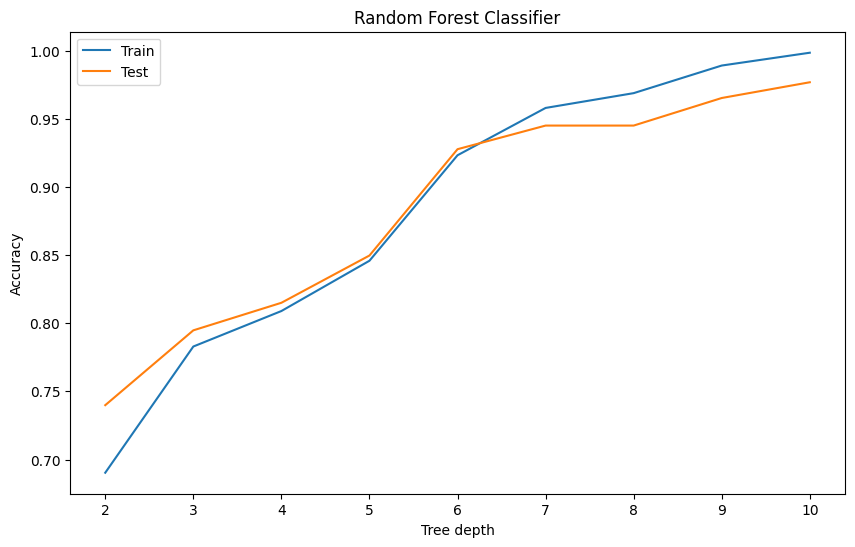

In [39]:
plt.figure(figsize=(10,6))
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier")
plt.plot(d, train_acc_rfc, label="Train")
plt.plot(d, test_acc_rfc, label="Test")
plt.legend()
plt.show()

In [40]:
train_acc_gbc = []
test_acc_gbc = []

In [41]:
start_time = time.time()

for depth in range(2,11):
    gbc = GradientBoostingClassifier(max_depth=depth)
    gbc.fit(X_train, y_train)
    gbc.predict(X_test)
    
    train_acc_gbc.append(rfc.score(X_train, y_train))
    test_acc_gbc.append(rfc.score(X_test, y_test))
    
print(f"--- Took {time.time() - start_time} seconds ---")

--- Took 37.53479337692261 seconds ---


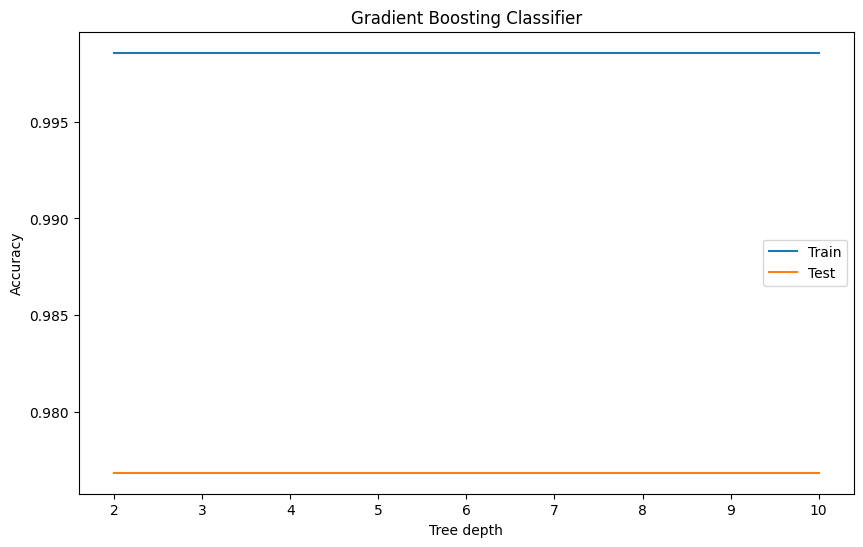

In [42]:
plt.figure(figsize=(10,6))
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.title("Gradient Boosting Classifier")
plt.plot(d, train_acc_gbc, label="Train")
plt.plot(d, test_acc_gbc, label="Test")
plt.legend()
plt.show()

By looking at the training and testing plots of both Random Forest Classifier and Gradient Boosting Classifier, we see that Gradient Boosting Classifier shows similar results in all the tree depths from 2 to 10. Random Forest Classifier, on the other hand, showed a gradual increase in both train and test.

However, the time it took for Gradient Boosting Classifier to finish the predictions with varying tree depths was 10 times more that of Random Forest Classifier. This is due to the fact that Gradient Boosting Classifier builds the tree sequentially.